In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # To save the filtered audio
import scipy.signal as signal

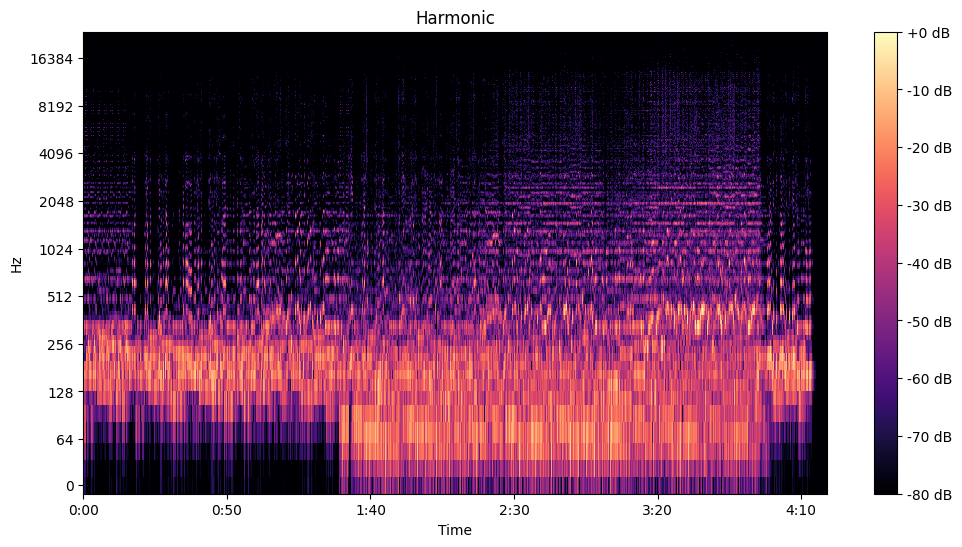

In [4]:
# Load the audio
audio_path = "./sample_data/Ed Sheeran - Photograph (Official Lyric Video) 0.wav"  # Your file path
y, sr = librosa.load(audio_path, sr=None)

# Perform Harmonic-Percussive Separation
harmonic, percussive = librosa.effects.hpss(y, margin=(4.0, 1.0))

# Save only the harmonic part (which contains guitar)
sf.write("harmonic.wav", harmonic, sr)
sf.write("percussive.wav", percussive, sr)

# Compute STFT of harmonic part
stft_harmonic = librosa.stft(harmonic)
stft_db = librosa.amplitude_to_db(np.abs(stft_harmonic), ref=np.max)

# Plot spectrogram of extracted guitar part
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Harmonic")
plt.show()


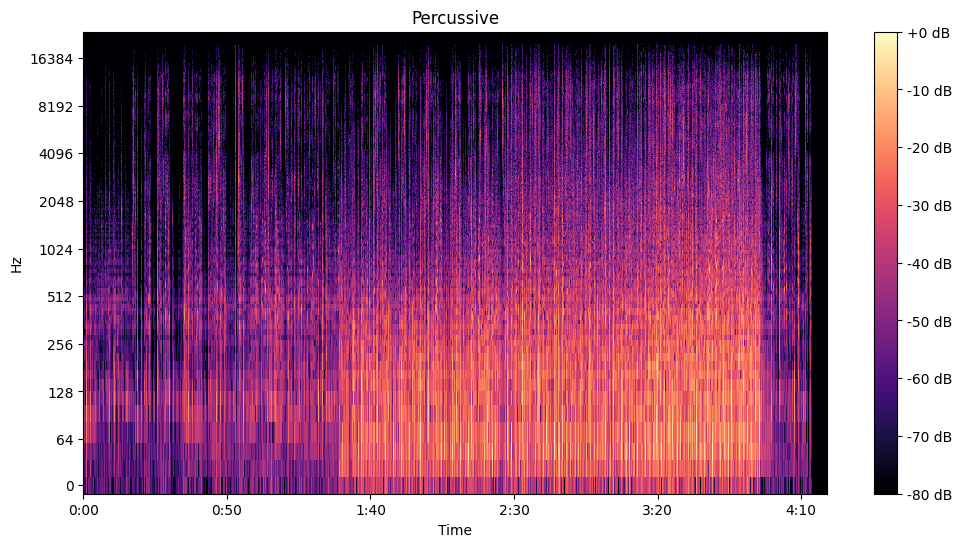

In [5]:
stft_percussive = librosa.stft(percussive)
stft_db_percussive = librosa.amplitude_to_db(np.abs(stft_percussive), ref=np.max)
plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_db_percussive, sr=sr, hop_length=512, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Percussive")
plt.show()

In [6]:
print(sr)

48000


In [7]:
def plot_variance(variance):
  plt.figure(figsize=(12, 6))
  plt.plot(variance)
  plt.show()

In [8]:
def variance(data):
  window_size = 100
  variance = []
  for i in range(0, len(data) - window_size, 100):
    window = data[i:i+window_size]
    var = np.var(window)
    variance.append(var)
  return variance

In [9]:
def butter_bandpass(low_freq, high_freq, sr, order=5):
    nyq = 0.5 * sr
    low = low_freq / nyq
    high = high_freq / nyq
    sos = signal.butter(order, [low, high], btype='band', output='sos')
    return sos

def apply_bandpass(audio, low_freq, high_freq, sr, order=5):
    sos = butter_bandpass(low_freq, high_freq, sr, order=order)
    y_filtered = signal.sosfiltfilt(sos, audio)
    return y_filtered


In [10]:
def var_to_sample_points(bass, selected_points, window_size=100):
    """
    Returns a version of the input bass signal with only selected window chunks preserved,
    rest filled with zeros.
    """
    output = np.zeros_like(bass)
    for idx in selected_points:
        start = idx * window_size
        end = start + window_size
        output[start:end] = bass[start:end]
    return output

In [ ]:
low_bass = apply_bandpass(percussive, 20, 100, sr, 5)
low_var = variance(low_bass)
threshold = np.percentile(low_var, 80)
print(f"threshold: {threshold}")
kick_indices = [i for i, v in enumerate(low_var) if v > threshold]
print(f"kick_indices: {kick_indices}")

low_bass_filter_data = var_to_sample_points(low_bass, kick_indices)

# Save as a proper WAV file
sf.write("kick_drum_low_bass.wav", low_bass_filter_data, sr)

threshold: 1.4448447156196e-05
kick_indices: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 432, 434, 435, 436, 437, 439, 440, 442, 443, 445, 448, 564, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 588, 589, 797, 799, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 819, 820, 821, 822, 989, 991, 992, 993, 994, 996, 997, 999, 1000, 1002, 1003, 1005, 1123, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1143, 1144, 1146, 1154, 1155, 1164, 1167, 1192, 1194, 1195, 1205, 1208, 1232, 1233, 1235, 1236, 1276, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1376, 1377, 1379, 1380, 1396, 1399, 1408, 1409, 1411, 1412, 1414, 1436, 1439, 1452, 1479, 1545, 1547, 1548, 1550, 1551, 15

In [ ]:
moderate_bass = apply_bandpass(percussive, 100, 500, sr, 5)
moderate_var = variance(moderate_bass)
threshold = np.percentile(moderate_var, 80)
print(f"threshold: {threshold}")
kick_indices = [i for i, v in enumerate(moderate_var) if v > threshold]
print(f"kick_indices: {kick_indices}")

medium_bass_filter_data = var_to_sample_points(moderate_bass, kick_indices)

# Save as a proper WAV file
sf.write("kick_drum_medium_bass.wav", medium_bass_filter_data, sr)

threshold: 0.0004632266018327531
kick_indices: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 432, 433, 434, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 452, 453, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 579, 580, 581, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 849, 852, 853, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999, 1000, 1001, 1003, 1009, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1136, 1138, 1173, 1194, 1207, 1221, 1234, 1262, 1275, 1302, 1356, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1371, 1373, 1546, 1547, 1548, 1549, 1550, 1552, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1566, 1683, 1684, 1686, 1688, 1689, 1690, 1691, 1694, 1917, 1919, 1921, 1923, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2111, 2113, 2117, 2240, 2241, 2245, 2246, 2247, 2248, 2249, 2252, 2287, 2314, 2341, 2355, 2473, 2476, 2478, 2480, 2481, 2484, 2485, 2657, 2659

In [ ]:
high_bass = apply_bandpass(percussive, 500, 2000, sr, 5)
high_var = variance(high_bass)

threshold = np.percentile(high_var, 80)
print(f"threshold: {threshold}")
kick_indices = [i for i, v in enumerate(high_var) if v > threshold]
print(f"kick_indices: {kick_indices}")

high_bass_filter_data = var_to_sample_points(high_bass, kick_indices)

# Save as a proper WAV file
sf.write("kick_drum_high_bass.wav", high_bass_filter_data, sr)

threshold: 0.00017110474655258125
kick_indices: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 244, 245, 246, 247, 248, 249, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 447, 448, 449, 450, 451, 452, 453, 523, 526, 528, 529, 531, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 573, 574, 575, 576, 577, 801, 802, 803, 806, 852, 853, 854, 856, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1215, 1222, 1358, 1359, 1360, 1361, 1539, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1566, 1568, 1683, 1684, 1685, 1687, 1916, 2099, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2245, 2247, 2469, 2470, 2473, 2474, 2658, 2659, 2660, 2661, 2662, 2663

In [ ]:
kick_drums_separated = low_bass_filter_data + medium_bass_filter_data
sf.write("kick_drums_separated.wav", kick_drums_separated, sr)

In [31]:
#Guitar Range --> 150 Hz to 1.2 kHz

guitar = apply_bandpass(harmonic, 150, 1200, sr, 5)
sf.write("guitar.wav", guitar, sr)

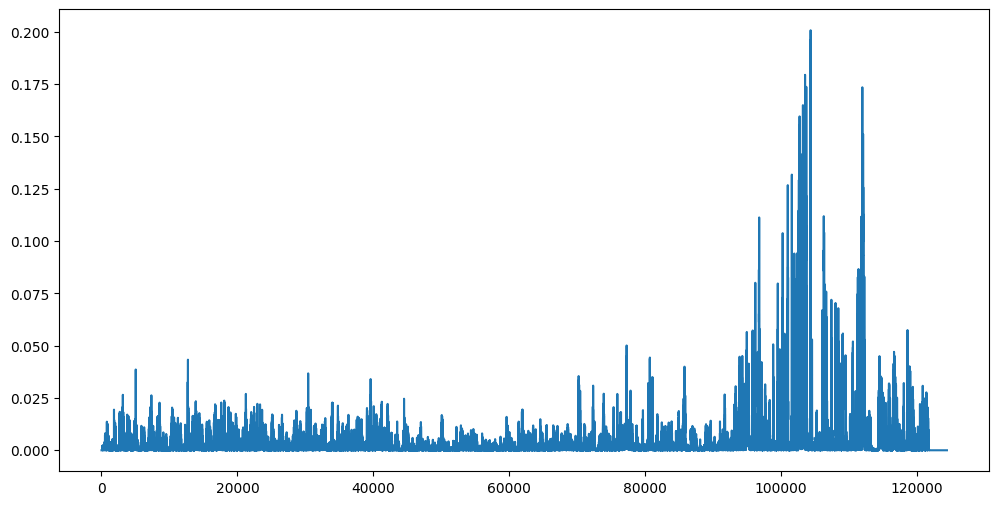

In [22]:
guitar_var = variance(guitar)
plot_variance(guitar_var)

In [48]:
threshold_upper = np.percentile(guitar_var, 70)
threshold_lower = np.percentile(guitar_var, 30)
print(f"threshold_upper: {threshold_upper}")
print(f"threshold_lower: {threshold_lower}")

selected_points = [i for i, v in enumerate(guitar_var) if v < threshold_upper and v > threshold_lower]

# Focus on high-energy frames only
# threshold_high = np.percentile(guitar_var, 90)
# selected_points = [i for i, v in enumerate(guitar_var) if v < threshold_high]

print(f"selected_points: {selected_points}")

guitar_filter_data = var_to_sample_points(guitar, selected_points)

# Save as a proper WAV file
sf.write("guitar_filter_data.wav", guitar_filter_data, sr)

threshold_upper: 0.0018942675513291339
threshold_lower: 0.00024274630198182744
selected_points: [106, 109, 110, 112, 113, 115, 116, 117, 118, 120, 121, 123, 124, 126, 127, 129, 130, 132, 133, 135, 136, 138, 140, 141, 143, 144, 146, 147, 149, 150, 153, 156, 158, 159, 161, 162, 164, 165, 166, 167, 169, 170, 172, 173, 175, 176, 178, 179, 182, 183, 185, 186, 188, 189, 190, 191, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 228, 229, 231, 232, 235, 236, 238, 239, 241, 242, 244, 247, 248, 250, 251, 261, 264, 265, 267, 268, 270, 271, 273, 274, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 289, 290, 292, 293, 296, 299, 302, 305, 306, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 321, 322, 324, 325, 327, 328, 330, 331, 334, 337, 341, 342, 344, 345, 347, 348, 350, 351, 353, 354, 356, 357, 359, 360, 363, 366, 374, 375, 377, 378, 379, 380, 383, 384, 386, 387, 390, 393

In [36]:
import numpy as np

guitar_var = np.array(guitar_var)  # Convert list to NumPy array
target_value = 0.025

# Calculate the percentile position of 0.025 in the distribution
target_percentile = np.sum(guitar_var < target_value) / len(guitar_var) * 100
print(f"Variance < {target_value} covers approximately the {target_percentile:.2f}th percentile")


Variance < 0.025 covers approximately the 97.60th percentile
